### Miriam Analysis
* Cloudiness is shown evenly throughout the various cities; however, most cities have the same level of cloudiness percentage regardless of latitude. 
* Most of the cities have a humidity percentage of >= 40%.
* More cities were called in the Northern Hemisphere than the Southern Hemisphere; however, there doesn't appear to be any correlation between latitude and wind speed. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# Start call counter at 1
record = 1

# Create print log
print(f"Beginning Data Retrieval")
print(f"------------------------------")

# Loop through the cities in city list

for city in cities:
    # Try statement to append cells where city is found
    try:
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by 1
        record = record + 1
        
        # Wait 1 second in loop
        time.sleep(1.01)
    
    #If record not found, skip to the next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
------------------------------
Processing Record 1 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=oranjemund
Processing Record 2 | Qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=qaanaaq
Processing Record 3 | Caronport
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=caronport
Processing Record 4 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=arraial do cabo
Processing Record 5 | Mecca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=mecca
Processing Record 6 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=saint george
Processing Record 7 | Mar del Plata
http://api.openweathermap.org/

Processing Record 57 | Dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=dingle
City not found. Skipping...
Processing Record 58 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=dikson
Processing Record 59 | Gazli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=gazli
Processing Record 60 | Tagusao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=tagusao
Processing Record 61 | Novopokrovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=novopokrovka
Processing Record 62 | Vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=vaini
Processing Record 63 | Natitingou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a4

City not found. Skipping...
Processing Record 111 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=kahului
Processing Record 112 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=bethel
Processing Record 113 | Burnie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=burnie
Processing Record 114 | Iaciara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=iaciara
City not found. Skipping...
City not found. Skipping...
Processing Record 115 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=leningradskiy
Processing Record 116 | Macae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=macae
Processing Record 117 | Dangriga
http://api.openweathe

Processing Record 166 | Zhanaozen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=zhanaozen
Processing Record 167 | Awbari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=awbari
City not found. Skipping...
Processing Record 168 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=kapaa
Processing Record 169 | Black River
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=black river
Processing Record 170 | High Level
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=high level
City not found. Skipping...
Processing Record 171 | Starozhilovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=starozhilovo
City not found. Skipping...
Processing Record 172 | Vanavara
htt

Processing Record 221 | Geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=geraldton
Processing Record 222 | Catuday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=catuday
Processing Record 223 | Amuntai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=amuntai
Processing Record 224 | Rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=rocha
Processing Record 225 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=zhigansk
Processing Record 226 | Marrakesh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=marrakesh
Processing Record 227 | Yeniseysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q

Processing Record 277 | Santona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=santona
Processing Record 278 | Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=petropavlovsk-kamchatskiy
Processing Record 279 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=labuan
City not found. Skipping...
Processing Record 280 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=port macquarie
Processing Record 281 | Zhuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=zhuzhou
Processing Record 282 | San Patricio
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=san patricio
Processing Record 283 | Nishihara
http://api.openweath

Processing Record 333 | Kenai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=kenai
Processing Record 334 | Khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=khandyga
Processing Record 335 | Sisimiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=sisimiut
Processing Record 336 | Isiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=isiro
City not found. Skipping...
Processing Record 337 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=iquitos
Processing Record 338 | Gamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=gamba
Processing Record 339 | Sao Felix do Xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be63

Processing Record 389 | Luganville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=luganville
Processing Record 390 | Okato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=okato
Processing Record 391 | Zhanakorgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=zhanakorgan
Processing Record 392 | Mapastepec
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=mapastepec
Processing Record 393 | Oskemen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=oskemen
Processing Record 394 | Tessalit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=tessalit
Processing Record 395 | Auki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e

Processing Record 445 | Biltine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=biltine
Processing Record 446 | Klichka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=klichka
Processing Record 447 | Mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=mitsamiouli
Processing Record 448 | Sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=sibolga
Processing Record 449 | Komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=komsomolskiy
Processing Record 450 | Cochabamba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=cochabamba
Processing Record 451 | Wanlaweyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd2

Processing Record 501 | Bontang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=bontang
Processing Record 502 | Khartoum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=khartoum
Processing Record 503 | Tacuati
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=tacuati
Processing Record 504 | Port-Gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=port-gentil
Processing Record 505 | Chifeng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=chifeng
Processing Record 506 | Khasan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q=khasan
Processing Record 507 | College
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=843a7d0be6363fd247a46ce3e7e6a5c7&q

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictionary of lists
weather_dict = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed    
}

# Create a data frame
weather_df = pd.DataFrame(weather_dict)

weather_df.count()

City          552
Cloudiness    552
Country       552
Date          552
Humidity      552
Lat           552
Lng           552
Max Temp      552
Wind Speed    552
dtype: int64

In [19]:
# Save data frame to CSV
weather_df.to_csv("Weather Output/weather_data.csv")

# Display data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Oranjemund,0,ZA,1555901602,84,-28.55,16.43,60.30,12.21
1,Qaanaaq,100,GL,1555901604,84,77.48,-69.36,8.35,6.38
2,Caronport,0,CA,1555901195,34,50.46,-105.81,48.00,1.99
3,Arraial do Cabo,0,BR,1555901606,78,-22.97,-42.02,75.56,7.92
4,Mecca,0,SA,1555901335,50,21.43,39.83,67.97,6.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

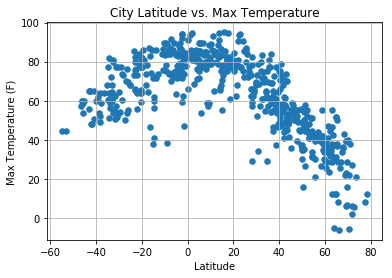

In [20]:
# Build Latitude vs Temperature scatter plat
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=30)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather Plots/Latitude_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

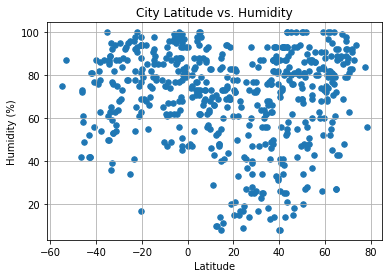

In [21]:
# Build Latitude vs Humidity scatter plat
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=30)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather Plots/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

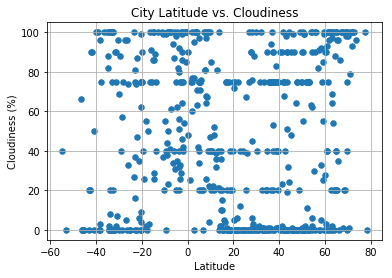

In [22]:
# Build Latitude vs Cloudiness scatter plat
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=30)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather Plots/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

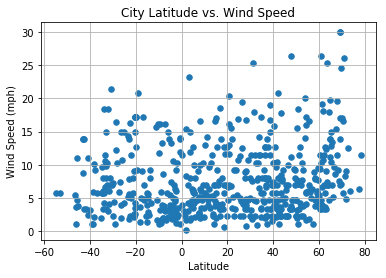

In [23]:
# Build Latitude vs Wind Speed scatter plat
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=30)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("Weather Plots/Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()